## **Exploratory Data Analysis -Terrorism-**

**Data Loading and Preprocessing**

In [ ]:
import pandas as pd

# Load the dataset
!pip install chardet
import chardet

with open('globalterrorismdb_0718dist.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
    !iconv -f {encoding} -t UTF-8 globalterrorismdb_0718dist.csv > globalterrorismdb_0718dist_utf8.csv
    data = pd.read_csv('globalterrorismdb_0718dist_utf8.csv')
# Display the first few rows of the dataset
data.head()


<ipython-input-1-7d12dfed46e0>:10: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist_utf8.csv')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


**Descriptive Statistics**

In [ ]:
# Display basic statistics
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,9.656000e+03,9656.000000,9656.000000,9656.000000,9655.000000,9655.000000,9655.000000,9353.000000,9353.000000,9655.000000,...,2.820000e+02,1.0,7.900000e+01,1.0,449.000000,347.000000,9655.000000,9655.000000,9655.000000,9655.000000
mean,1.976036e+11,1975.971935,6.282001,15.164561,0.026308,220.367892,6.021647,33.155350,-20.829568,1.203418,...,5.019458e+06,20000.0,1.498046e+06,0.0,2.810690,6.345821,-3.149871,-3.096634,0.347903,-1.825893
std,2.889043e+08,2.890571,3.368098,9.022129,0.160057,187.250876,3.289915,22.172133,53.255134,0.823601,...,5.982205e+07,NaN,5.104807e+06,NaN,1.261473,23.262047,4.430647,4.482302,0.664311,4.232378
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.974060e+11,1974.000000,3.000000,7.000000,0.000000,96.000000,2.000000,25.699073,-73.931351,1.000000,...,0.000000e+00,20000.0,6.000000e+03,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.977060e+11,1977.000000,6.000000,15.000000,0.000000,185.000000,8.000000,40.697132,-5.956210,1.000000,...,1.200000e+04,20000.0,8.000000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.978123e+11,1978.000000,9.000000,23.000000,0.000000,217.000000,8.000000,46.669097,11.119059,1.000000,...,5.000000e+05,20000.0,1.000000e+06,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.979111e+11,1979.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


**Data Visualization**

Time Series Analysis

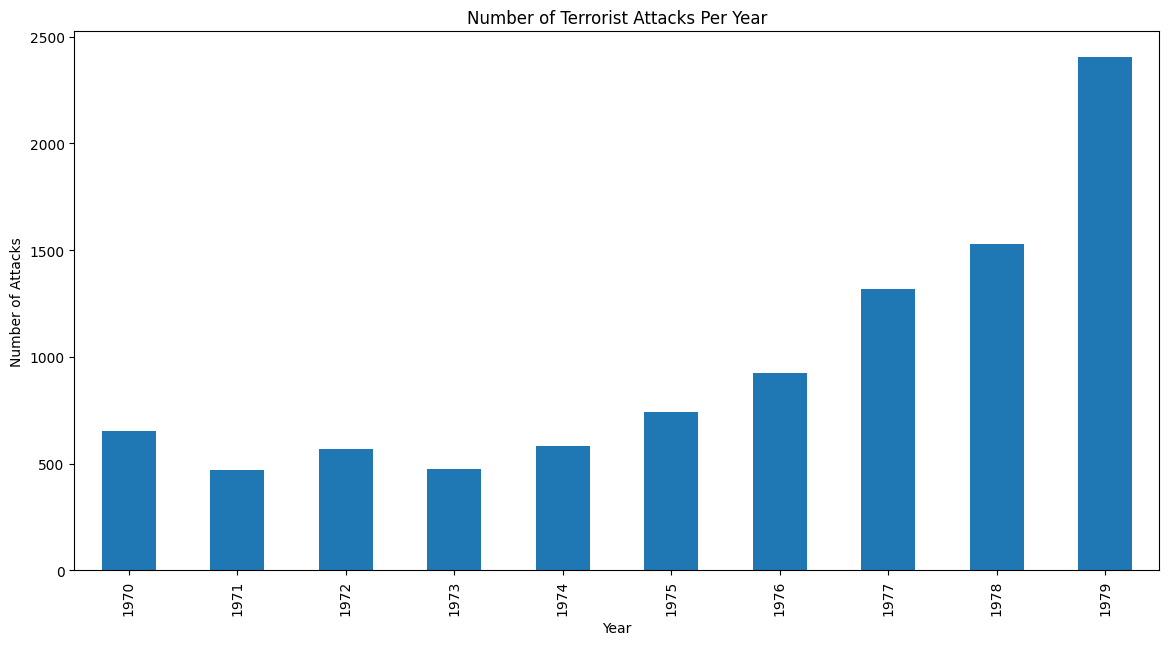

In [ ]:
import matplotlib.pyplot as plt

# Plotting number of attacks per year
data['iyear'].value_counts().sort_index().plot(kind='bar', figsize=(14, 7))
plt.title('Number of Terrorist Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

Geographic Analysis

<ipython-input-4-be43c2a2a655>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


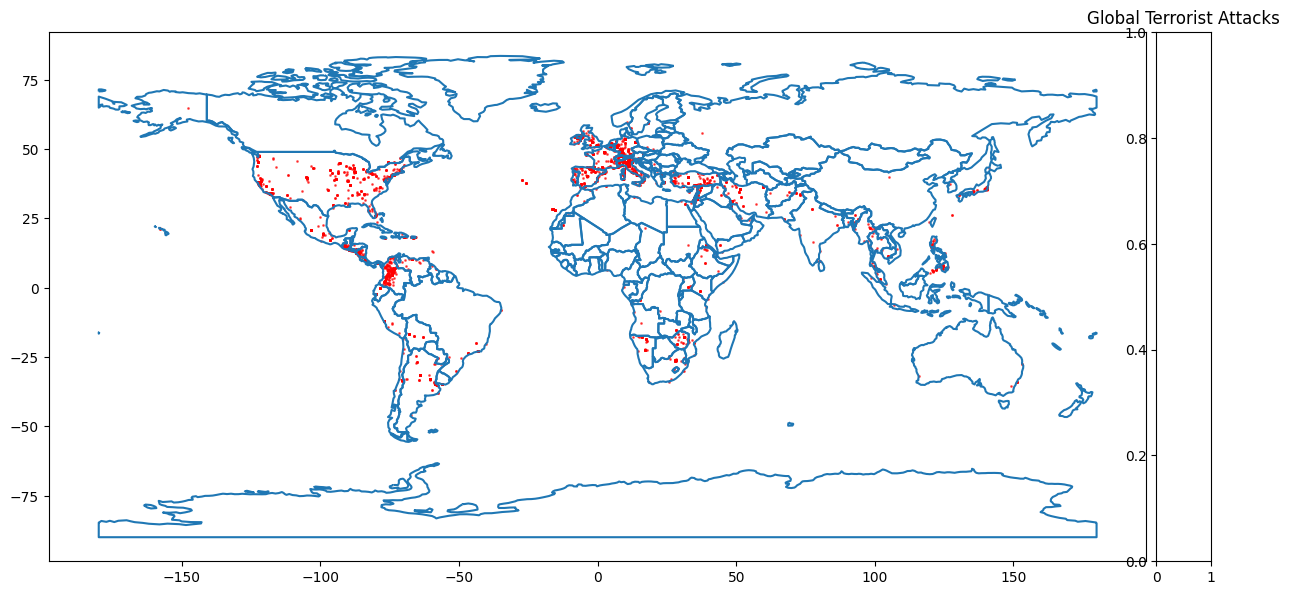

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Plotting the attacks on a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=1, alpha=0.6)
plt.title('Global Terrorist Attacks')
plt.show()

Attack Type Analysis

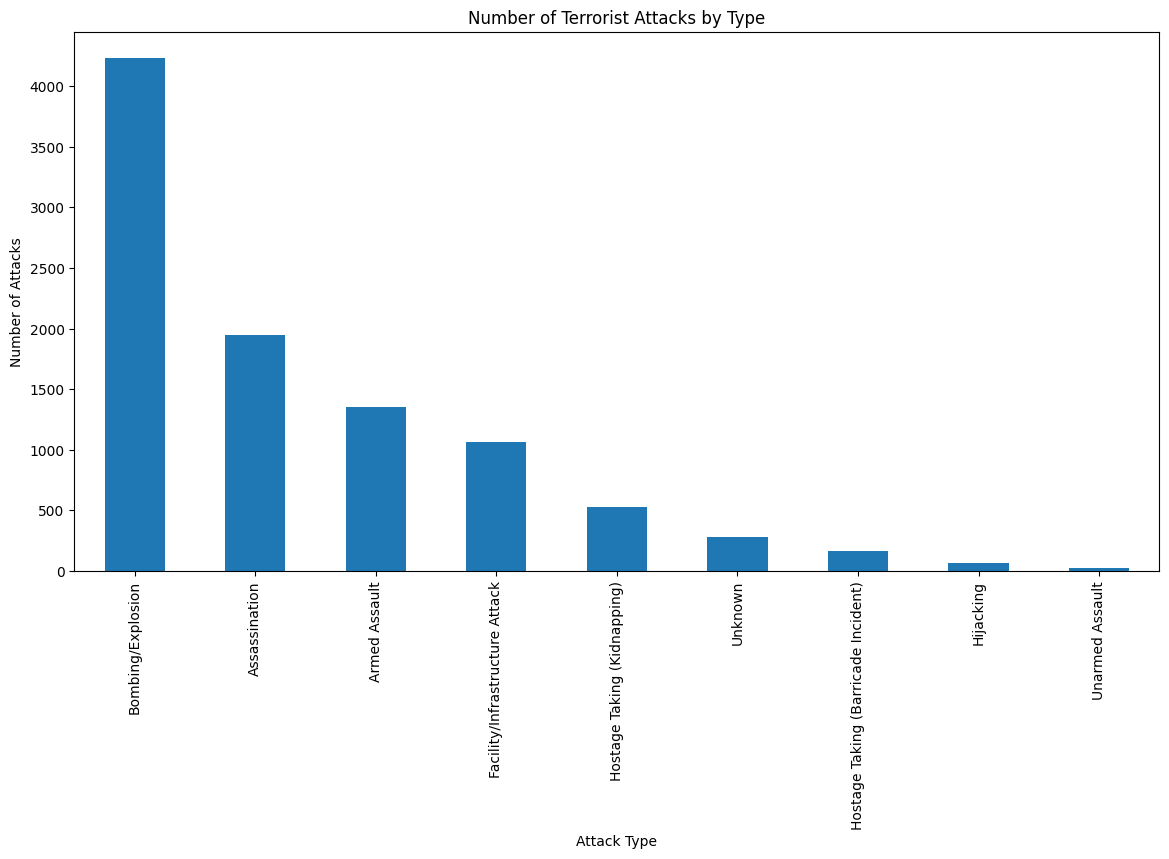

In [ ]:
# Plotting attack types
data['attacktype1_txt'].value_counts().plot(kind='bar', figsize=(14, 7))
plt.title('Number of Terrorist Attacks by Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.show()

**Step 4: Geospatial Analysis**
We will dive deeper into geographic analysis to identify specific regions with high frequencies of terrorist activities.

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
!pip install chardet
import chardet

with open('globalterrorismdb_0718dist.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
    !iconv -f {encoding} -t UTF-8 globalterrorismdb_0718dist.csv > globalterrorismdb_0718dist_utf8.csv
    data = pd.read_csv('globalterrorismdb_0718dist_utf8.csv')

# Drop rows with NaN values in 'latitude' or 'longitude' columns
data = data.dropna(subset=['latitude', 'longitude'])

# Create a base map
base_map = folium.Map(location=[0, 0], zoom_start=2)

# Create a list of [latitude, longitude, weight]
heat_data = data[['latitude', 'longitude']].values.tolist()

# Plot heat map
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map.save('heatmap.html')
base_map

<ipython-input-10-ea0abedbe9bc>:12: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist_utf8.csv')


**Step 5: Pattern Detection**
We will identify patterns and trends within the dataset.

<ipython-input-14-f01c8d61c5b8>:12: DtypeWarning: Columns (4,31,33,54,60,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist_utf8.csv')


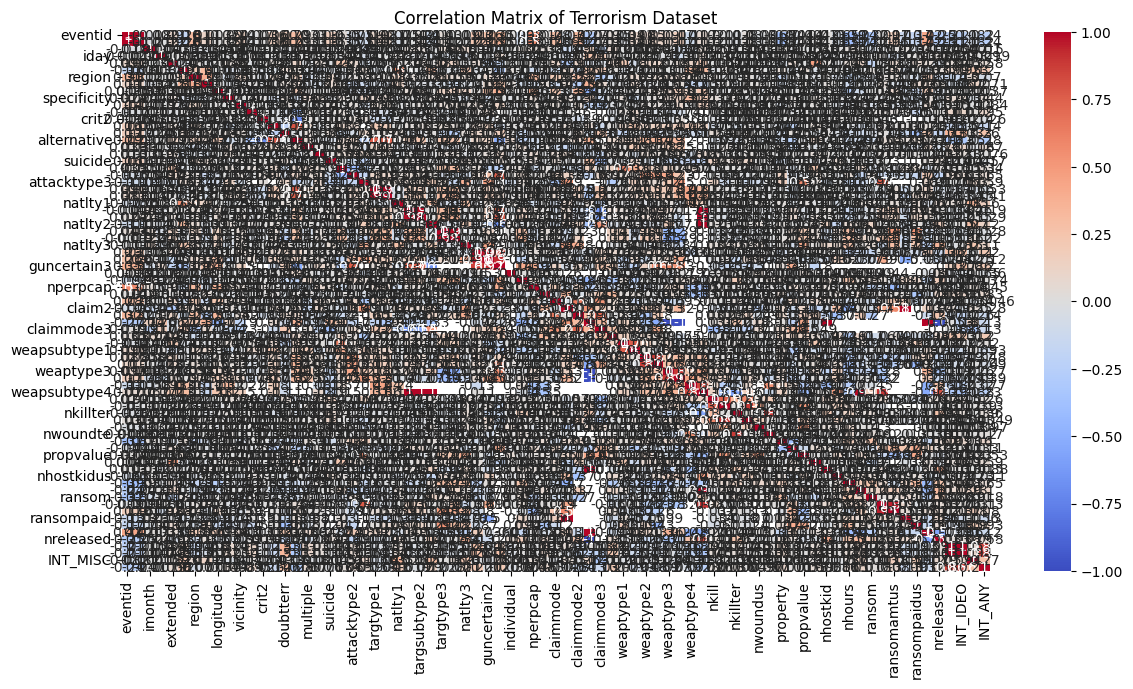

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
!pip install chardet
import chardet

with open('globalterrorismdb_0718dist.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
    !iconv -f {encoding} -t UTF-8 globalterrorismdb_0718dist.csv > globalterrorismdb_0718dist_utf8.csv
    data = pd.read_csv('globalterrorismdb_0718dist_utf8.csv')

# Drop non-numeric columns or encode them appropriately
# For simplicity, let's drop columns with non-numeric data
numeric_data = data.select_dtypes(include=['number'])

# Plotting correlations
corr_matrix = numeric_data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Terrorism Dataset')
plt.show()


Step 6: Security Insights
Based on our analysis, we can derive several insights:

Hot Zones: Specific countries and regions with the highest frequency of attacks.
Attack Trends: Periods of increased activity, possibly correlating with geopolitical events.
Target Types: Commonly targeted entities, which can help in prioritizing security measures.

**Step 7: Dashboard Creation**

In [ ]:
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# Sample plotly dashboard
app = dash.Dash(__name__)

fig = px.scatter_geo(data, lat='latitude', lon='longitude',
                     hover_name='country_txt',
                     color='attacktype1_txt',
                     title='Global Terrorism Incidents')

app.layout = html.Div(children=[
    html.H1(children='Global Terrorism Dashboard'),
    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.9 MB/s eta 0:00:00


<ipython-input-16-f2efbd76270f>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-16-f2efbd76270f>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>